In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in 2024 seeds and create a team name map
tourny_seeds = pd.read_csv("Data/2024_tourney_seeds.csv")
mteams = pd.read_csv("Data/MTeams.csv")
wteams = pd.read_csv("Data/WTeams.csv")
mteams_map = mteams.set_index("TeamID")["TeamName"]
wteams_map = mteams.set_index("TeamID")["TeamName"]

In [3]:
mteams["Tournament"] = "M"
mteams["Tournament"] = "W"
teams = pd.concat([mteams, wteams])
team_map = teams.set_index("TeamID")["TeamName"]

In [4]:
# add team name, region and ChalkRank to the seeds df
tourny_seeds["TeamName"] = tourny_seeds["TeamID"].map(team_map)
tourny_seeds["Region"] = tourny_seeds["Seed"].str[0]
tourny_seeds["ChalkRank"] = tourny_seeds["Seed"].str[1:].astype(int)
tourny_seeds.query("ChalkRank == 1")

,Tournament,Seed,TeamID,TeamName,Region,ChalkRank
0,M,W01,1345,Purdue,W,1
16,M,X01,1104,Alabama,X,1
32,M,Y01,1222,Houston,Y,1
48,M,Z01,1242,Kansas,Z,1
64,W,W01,3376,South Carolina,W,1
80,W,X01,3390,Stanford,X,1
96,W,Y01,3231,Indiana,Y,1
112,W,Z01,3439,Virginia Tech,Z,1


In [5]:
tourny_seeds[["Tournament", "Region"]].value_counts()

Tournament  Region
M           W         16
            X         16
            Y         16
            Z         16
W           W         16
            X         16
            Y         16
            Z         16
Name: count, dtype: int64

In [6]:
mtourney_seeds = pd.read_csv("Data/MNCAATourneySeeds.csv")
wtourney_seeds = pd.read_csv("Data/WNCAATourneySeeds.csv")
mtourney_slots = pd.read_csv("Data/MNCAATourneySlots.csv")
wtourney_slots = pd.read_csv("Data/WNCAATourneySlots.csv")
# add the round to the slots df
mtourney_slots["Round"] = mtourney_slots["Slot"].str[:2]
mtourney_slots.query("Round == 'R1'").query("Season == 2023")

,Season,Slot,StrongSeed,WeakSeed,Round
2385,2023,R1W1,W01,W16,R1
2386,2023,R1W2,W02,W15,R1
2387,2023,R1W3,W03,W14,R1
2388,2023,R1W4,W04,W13,R1
2389,2023,R1W5,W05,W12,R1
2390,2023,R1W6,W06,W11,R1
2391,2023,R1W7,W07,W10,R1
2392,2023,R1W8,W08,W09,R1
2393,2023,R1X1,X01,X16,R1
2394,2023,R1X2,X02,X15,R1


In [7]:
# combine mens and woments seends df's
df_seeds = pd.concat(
    [
        pd.read_csv("Data/MNCAATourneySeeds.csv"),
        pd.read_csv("Data/WNCAATourneySeeds.csv"),
    ],
    ignore_index=True,
)

df_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [8]:
# combine all season results
df_season_results = pd.concat(
    [
        pd.read_csv("Data/MRegularSeasonCompactResults.csv").assign(League="M"),
        pd.read_csv("Data/WRegularSeasonCompactResults.csv").assign(League="W"),
    ],
    ignore_index=True,
)
df_season_results = df_season_results.drop(["WLoc", "NumOT"], axis=1)

In [9]:
df_season_results["ScoreDiff"] = (
    df_season_results["WScore"] - df_season_results["LScore"]
)
df_season_results["WTeamName"] = df_season_results["WTeamID"].map(team_map)
df_season_results["LTeamName"] = df_season_results["LTeamID"].map(team_map)

<Axes: ylabel='Frequency'>

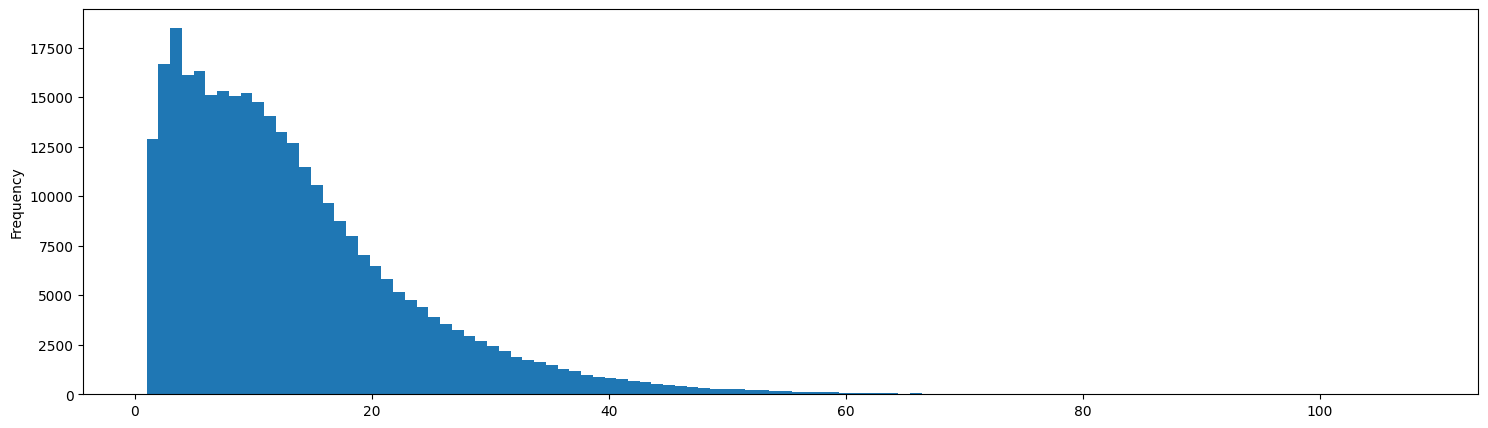

In [10]:
# df_season_results.query("Season == 2024").query("WTeamID == 3439").shape
df_season_results.sort_values("ScoreDiff", ascending=False)["ScoreDiff"].plot(
    kind="hist", bins=108, figsize=(18, 5)
)

In [11]:
df_season_results["ScoreDiff"].value_counts()

ScoreDiff
3     18504
2     16643
5     16318
4     16102
7     15308
      ...  
91        1
98        1
97        1
94        1
95        1
Name: count, Length: 93, dtype: int64

In [12]:
num_win = df_season_results.groupby(["Season", "WTeamID", "League"]).count()
num_win = num_win.reset_index()[["Season", "WTeamID", "League", "DayNum"]].rename(
    columns={"DayNum": "NumWins", "WTeamID": "TeamID"}
)

num_loss = df_season_results.groupby(["Season", "LTeamID", "League"]).count()
num_loss = num_loss.reset_index()[["Season", "LTeamID", "League", "DayNum"]].rename(
    columns={"DayNum": "NumLosses", "LTeamID": "TeamID"}
)


team_season_win_loss = num_win.merge(
    num_loss, on=["Season", "TeamID", "League"], how="outer"
)
team_season_win_loss["TeamName"] = team_season_win_loss["TeamID"].map(team_map)

In [13]:
team_season_win_loss["NumLosses"] = (
    team_season_win_loss["NumLosses"].fillna(0).astype(int)
)
team_season_win_loss["NumWins"] = team_season_win_loss["NumWins"].fillna(0).astype(int)

In [14]:
team_season_win_loss.loc[team_season_win_loss["NumLosses"] == 0].sort_values(
    "Season", ascending=False
).query("League == 'M'")
# team_season_win_loss.loc[team_season_win_loss["NumWins"] ==  0].sort_values("Season", ascending=False).query("League == 'M'")

,Season,TeamID,League,NumWins,NumLosses,TeamName
19399,2021,1211,M,26,0,Gonzaga
15230,2015,1246,M,34,0,Kentucky
14733,2014,1455,M,33,0,Wichita St
1989,1991,1424,M,30,0,UNLV


In [15]:
gap_win = (
    df_season_results.groupby(["Season", "WTeamID"])["ScoreDiff"].mean().reset_index()
)
gap_win = gap_win[["Season", "WTeamID", "ScoreDiff"]].rename(
    columns={"ScoreDiff": "DiffWins", "WTeamID": "TeamID"}
)

gap_loss = (
    df_season_results.groupby(["Season", "LTeamID"])["ScoreDiff"].mean().reset_index()
)
gap_loss = gap_loss[["Season", "LTeamID", "ScoreDiff"]].rename(
    columns={"ScoreDiff": "DiffLosses", "LTeamID": "TeamID"}
)

In [21]:
gap_win.merge(gap_loss, on=["Season", "TeamID"], how="outer").merge(
    team_map, on="TeamID"
).sort_values("Season", ascending=False)

,Season,TeamID,DiffWins,DiffLosses,TeamName
22149,2024,3478,11.285714,24.230769,Le Moyne
21675,2024,1359,16.478261,19.800000,Samford
21673,2024,1357,11.083333,11.733333,Sacred Heart
21672,2024,1356,12.444444,9.000000,S Illinois
21671,2024,1355,11.857143,8.916667,S Dakota St
...,...,...,...,...,...
183,1985,1337,9.700000,6.857143,Pepperdine
182,1985,1336,6.200000,12.052632,Penn St
181,1985,1335,9.615385,7.461538,Penn
180,1985,1334,6.857143,15.000000,Pacific
